In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Solution 1

In [2]:
fiscal_data = pd.read_csv("Sdf16_1a.txt", sep = "\t", low_memory = False)
fiscal_data.dropna(inplace = True) 

In [3]:
fiscal_data.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,0100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,0100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,0100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,0100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,0100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [4]:
fiscal_data_1 = fiscal_data[['STNAME', 'TFEDREV']].groupby(['STNAME']).sum()

In [5]:
fiscal_data_1 = fiscal_data_1.sort_values('TFEDREV', ascending = False).rename(columns = {'TFEDREV': 'federal_funding'})

In [6]:
fiscal_data_1['Rank'] = fiscal_data_1['federal_funding'].rank(ascending = 0)

In [7]:
fiscal_data_1[:10]

,federal_funding,Rank
STNAME,,
California,7709274795,1.0
Texas,6194316950,2.0
New York,3374793578,3.0
Florida,3147328988,4.0
Illinois,2334944853,5.0
Pennsylvania,2037314939,6.0
Ohio,1837962930,7.0
Georgia,1815241986,8.0
Michigan,1731033937,9.0


In [8]:
fiscal_data_1[-10:]

,federal_funding,Rank
STNAME,,
District of Columbia,226201985,42.0
Montana,220339869,43.0
South Dakota,196643958,44.0
Rhode Island,188203996,45.0
Maine,186522987,46.0
New Hampshire,169165780,47.0
North Dakota,155452961,48.0
Delaware,144706995,49.0
Wyoming,123011974,50.0


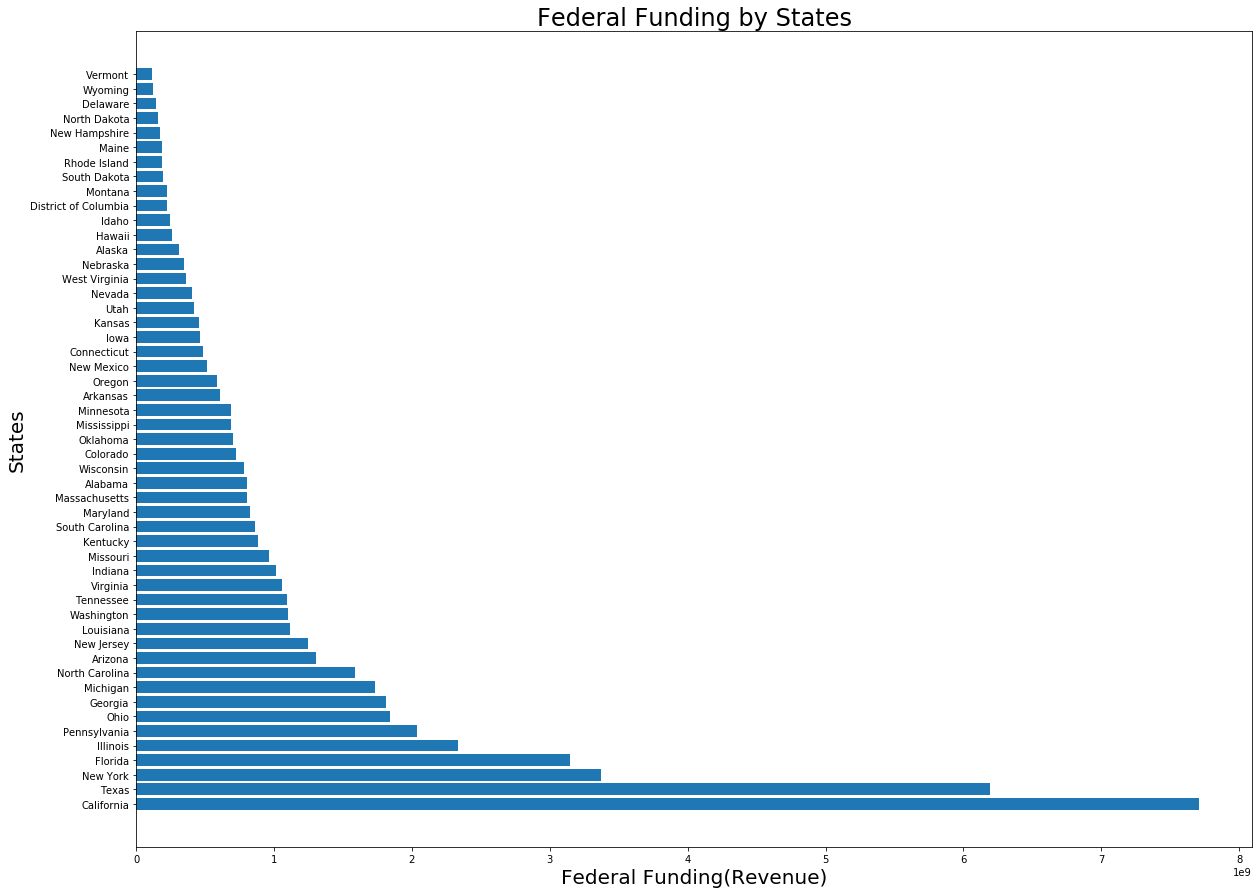

In [9]:
plt.figure(figsize = (20,15))
plt.barh(fiscal_data_1.index, fiscal_data_1['federal_funding'])
plt.xlabel("Federal Funding(Revenue)", size=20)
plt.ylabel("States", size=20)
plt.title("Federal Funding by States", size=24)
plt.savefig('q11.png')
plt.show()

In [10]:
fiscal_data_2 = fiscal_data[['STNAME', 'TFEDREV', 'V33']].groupby(['STNAME']).sum()

In [11]:
fiscal_data_2['federal funding per student'] = fiscal_data_2['TFEDREV'] / fiscal_data_2['V33']

In [12]:
fiscal_data_2 = fiscal_data_2.sort_values('federal funding per student', ascending = False).drop(['TFEDREV', 'V33'], axis= 1)

In [13]:
fiscal_data_2['Rank'] = fiscal_data_2['federal funding per student'].rank(ascending = 0)

In [14]:
fiscal_data_2[:10]

,federal funding per student,Rank
STNAME,,
District of Columbia,2713.262544,1.0
Alaska,2319.798908,2.0
Louisiana,1552.709811,3.0
New Mexico,1537.993342,4.0
Montana,1518.538036,5.0
South Dakota,1467.240384,6.0
Hawaii,1434.825133,7.0
North Dakota,1432.350143,8.0
Mississippi,1417.876006,9.0


In [15]:
fiscal_data_2[-10:]

,federal funding per student,Rank
STNAME,,
Iowa,915.077395,42.0
Wisconsin,901.924665,43.0
New Jersey,887.514409,44.0
Nevada,867.947733,45.0
Idaho,850.742049,46.0
Massachusetts,834.623055,47.0
Virginia,824.461967,48.0
Colorado,805.685833,49.0
Minnesota,794.707961,50.0


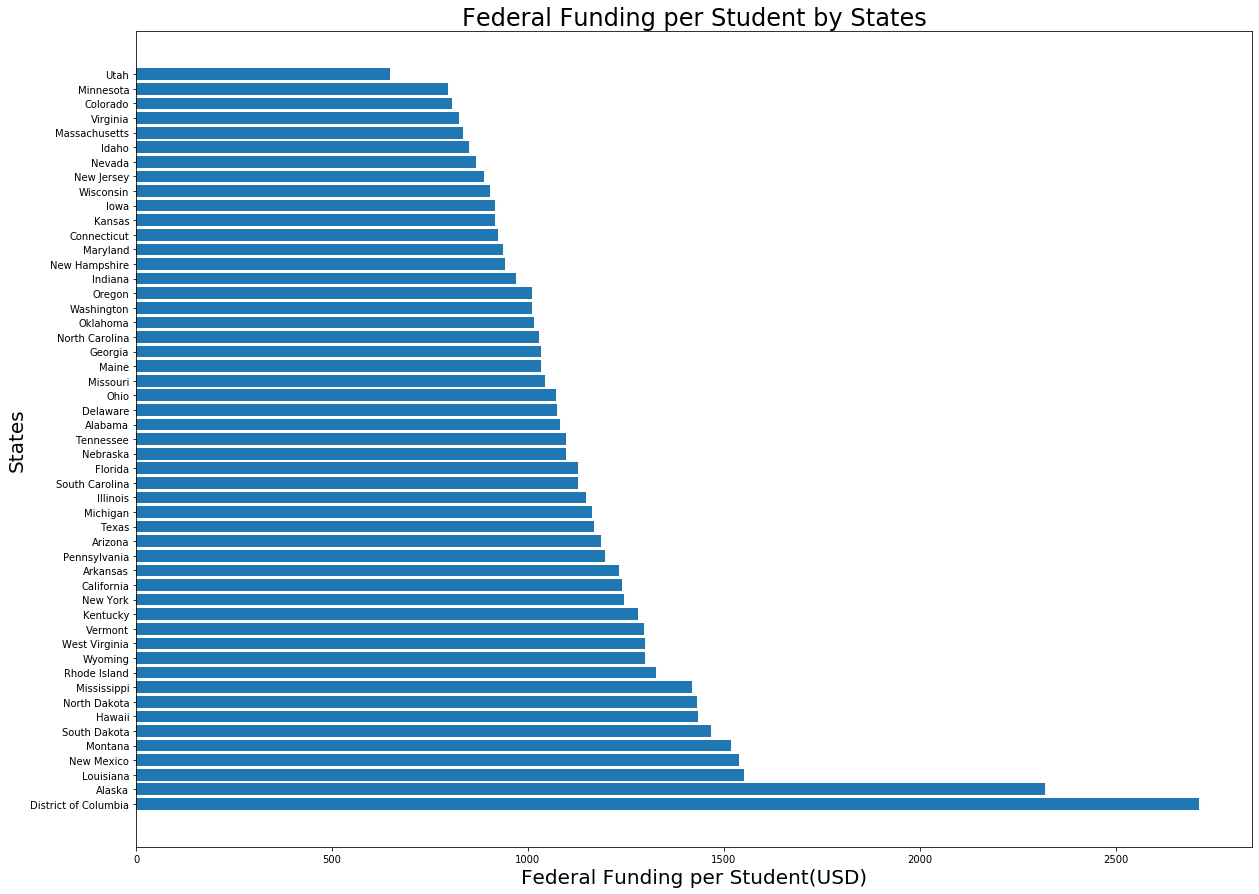

In [16]:
plt.figure(figsize = (20,15))
plt.barh(fiscal_data_2.index, fiscal_data_2['federal funding per student'])
plt.xlabel("Federal Funding per Student(USD)", size=20)
plt.ylabel("States",size=20)
plt.title("Federal Funding per Student by States",size=24)
plt.savefig("q12.png")
plt.show()

## Solution 2

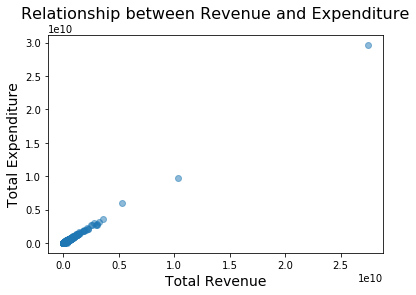

In [17]:
plt.scatter(fiscal_data['TOTALREV'], fiscal_data['TOTALEXP'], alpha = 0.5)
plt.xlabel("Total Revenue", size=14)
plt.ylabel("Total Expenditure",size=14)
plt.title("Relationship between Revenue and Expenditure",size=16, y=1.05)
plt.savefig("q21.png")
plt.show()

In [18]:
fiscal_data_3 = fiscal_data[['TOTALREV', 'TOTALEXP']]

In [19]:
fiscal_data_3 = fiscal_data_3.drop(fiscal_data_3[fiscal_data_3.TOTALREV <= 0].index)

In [20]:
fiscal_data_3 = fiscal_data_3.drop(fiscal_data_3[fiscal_data_3.TOTALEXP <= 0].index)

In [21]:
fiscal_data_3['percentage of revenue spent'] = (fiscal_data_3['TOTALEXP'] / fiscal_data_3['TOTALREV']) * 100

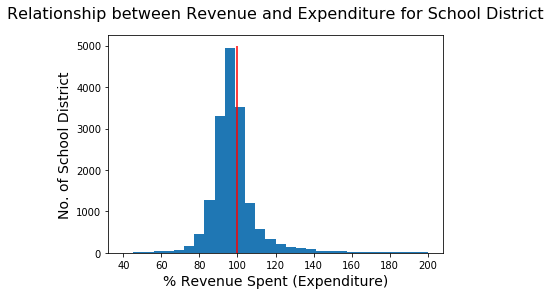

In [22]:
plt.hist(fiscal_data_3['percentage of revenue spent'], bins = 30, range=(40, 200))
plt.vlines(100, 0, 5000, color = 'red')
plt.xlabel("% Revenue Spent (Expenditure)", size=14)
plt.ylabel("No. of School District",size=14)
plt.title("Relationship between Revenue and Expenditure for School District",size=16, y=1.05)
plt.savefig("q22.png")
plt.show()

In [23]:
fiscal_data_4 = fiscal_data[['STNAME', '_66V', '_41F', 'V33']].groupby(['STNAME']).sum()

In [24]:
fiscal_data_4['debts per student'] = (fiscal_data_4['_66V'] + fiscal_data_4['_41F']) / fiscal_data_4['V33']

In [25]:
fiscal_data_4 = fiscal_data_4.sort_values('debts per student', ascending = False).drop(['_66V', '_41F', 'V33'], axis= 1)

In [26]:
fiscal_data_4['Rank'] = fiscal_data_4['debts per student'].rank(ascending = 0)

In [27]:
fiscal_data_4[:10]

,debts per student,Rank
STNAME,,
South Carolina,18363.631456,1.0
Minnesota,15604.977027,2.0
Texas,14831.382755,3.0
Pennsylvania,14469.028056,4.0
Michigan,12370.770468,5.0
Oregon,11973.637146,6.0
Kansas,11231.538383,7.0
New York,10981.059960,8.0
Washington,10491.974480,9.0


In [28]:
fiscal_data_4[-10:]

,debts per student,Rank
STNAME,,
Connecticut,4739.037225,42.0
Delaware,4639.157446,43.0
Arizona,4593.448401,44.0
Mississippi,3336.708589,45.0
Oklahoma,3147.283405,46.0
Vermont,2989.878919,47.0
Georgia,2585.728214,48.0
West Virginia,1246.413587,49.0
Wyoming,663.188799,50.0


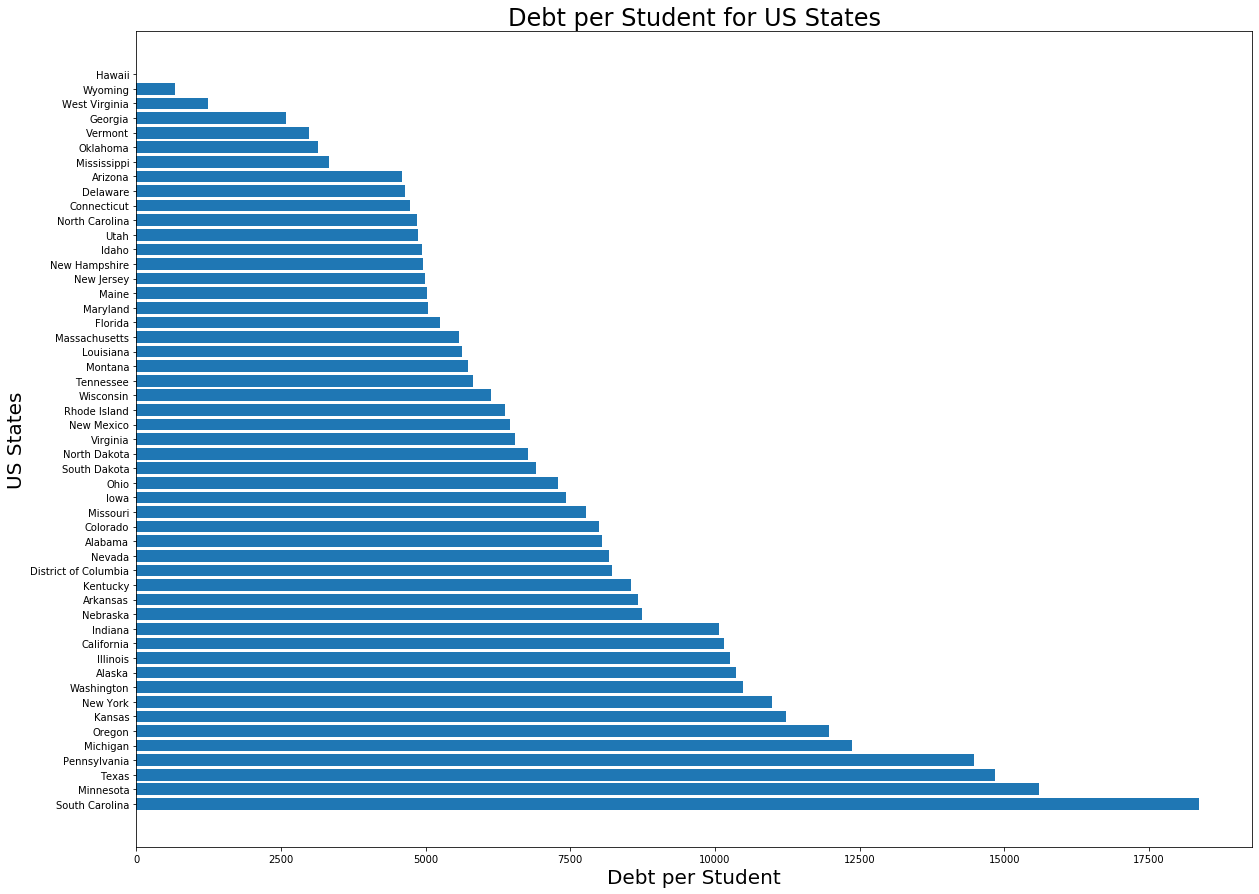

In [29]:
plt.figure(figsize = (20,15))
plt.barh(fiscal_data_4.index, fiscal_data_4['debts per student'])
plt.xlabel("Debt per Student", size=20)
plt.ylabel("US States",size=20)
plt.title("Debt per Student for US States",size=24)
plt.savefig("q23.png")
plt.show()

## Solution 3

In [51]:
math_achievement_data = pd.read_csv("math-achievement-lea-sy2015-16.csv", low_memory=False)

In [52]:
math_achievement_data.head()

,STNAM,FIPST,LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,MAM_MTH00PCTPROF_1516,MAS_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,14APR17,2638,42,5,PS,12,...,28,LE20,16,LE20,19,21-39,20,LE20,8,LT50
1,ALABAMA,1,100006,Marshall County,14APR17,3003,39,16,21-39,13,...,6,LT50,4,PS,4,PS,4,PS,2,PS
2,ALABAMA,1,100007,Hoover City,14APR17,7356,66,8,GE50,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,Madison City,14APR17,5482,72,30,60-79,501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,Leeds City,14APR17,1024,37,1,PS,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
def process_blurred_values(df, df_column_name):
    column_values = df[df_column_name].unique()
    column_values = list(map(str, column_values))
    type_num_column_values = [int(value) for value in column_values if value.isdigit()]
    
    min_column_value = min(type_num_column_values)
    max_column_value = max(type_num_column_values)
    mean_column_value = np.mean(type_num_column_values)
    print(min_column_value)
    print(max_column_value)
    print(mean_column_value)
    
    for value in column_values:
        if value.isdigit():
            df.loc[df[df_column_name] == value, df_column_name] = float(value)
        elif '-' in value:
            mean_of_range = np.mean(list(map(int, value.split('-'))))
            df.loc[df[df_column_name] == value, df_column_name] = mean_of_range
        elif 'GE' in value:
            df.loc[df[df_column_name] == value, df_column_name] = float(value[2:])
        elif 'LE' in value:
            df.loc[df[df_column_name] == value, df_column_name] = float(value[2:])
        elif 'GT' in value:
            upper_mean_value = np.mean([int(value[2:]), max_column_value])
            df.loc[df[df_column_name] == value, df_column_name] = upper_mean_value
        elif 'LT' in value:
            lower_mean_value = np.mean([min_column_value, int(value[2:])])
            df.loc[df[df_column_name] == value, df_column_name] = lower_mean_value 
        else:
            df.loc[df[df_column_name] == value, df_column_name] = mean_column_value

    return df

In [54]:
 math_achievement_data['ALL_MTH00PCTPROF_1516'].unique()

array(['42', '39', '66', '72', '37', '43', '69', '21', '62', '47', '34',
       '60', '23', '54', '48', '46', '50', '11', '19', '35', '51', '13',
       '26', '32', '22', '27', '41', '49', '44', '31', '38', '67', '53',
       '33', '20', '36', '14', '63', '40', '56', '45', '52', '10', '17',
       '29', '28', '87', '59', '58', '78', '10-14', '30', '25-29',
       '30-34', '60-64', '30-39', '61', '45-49', '68', '35-39', '11-19',
       'LT50', 'PS', '65-69', '80-89', '85-89', '55-59', 'LE10', '55',
       '2', '15-19', '40-44', '50-54', 'LE20', '16', 'LE5', '20-29',
       '21-39', '70-74', '15', 'GE90', '86', '76', '40-49', '24', '75-79',
       '74', '25', '50-59', '70-79', '6-9', '85', '7', '40-59', '60-79',
       '80-84', '20-24', '71', '65', '8', '64', '82', 'GE50', '80', '70',
       '77', '88', '83', '93', '81', '57', '75', '84', '92', '73', 'GE95',
       '18', '12', '6', '9', '3', '90', 'LE1', '4', 'GE80', '5', '60-69',
       '79', '89', '98', '91', '95', '90-94', '94', 'GE99

In [55]:
math_achievement_data = process_blurred_values(math_achievement_data, 'ALL_MTH00PCTPROF_1516')

2
98
50.0


In [56]:
math_achievement_data['ALL_MTH00PCTPROF_1516'].unique()

array([42.0, 39.0, 66.0, 72.0, 37.0, 43.0, 69.0, 21.0, 62.0, 47.0, 34.0,
       60.0, 23.0, 54.0, 48.0, 46.0, 50.0, 11.0, 19.0, 35.0, 51.0, 13.0,
       26.0, 32.0, 22.0, 27.0, 41.0, 49.0, 44.0, 31.0, 38.0, 67.0, 53.0,
       33.0, 20.0, 36.0, 14.0, 63.0, 40.0, 56.0, 45.0, 52.0, 10.0, 17.0,
       29.0, 28.0, 87.0, 59.0, 58.0, 78.0, 12.0, 30.0, 34.5, 61.0, 68.0,
       15.0, 84.5, 57.0, 55.0, 2.0, 16.0, 5.0, 24.5, 90.0, 86.0, 76.0,
       44.5, 24.0, 77.0, 74.0, 25.0, 54.5, 74.5, 7.5, 85.0, 7.0, 49.5,
       69.5, 82.0, 71.0, 65.0, 8.0, 64.0, 80.0, 70.0, 88.0, 83.0, 93.0,
       81.0, 75.0, 84.0, 92.0, 73.0, 95.0, 18.0, 6.0, 9.0, 3.0, 1.0, 4.0,
       64.5, 79.0, 89.0, 98.0, 91.0, 94.0, 99.0, 96.0, 97.0], dtype=object)

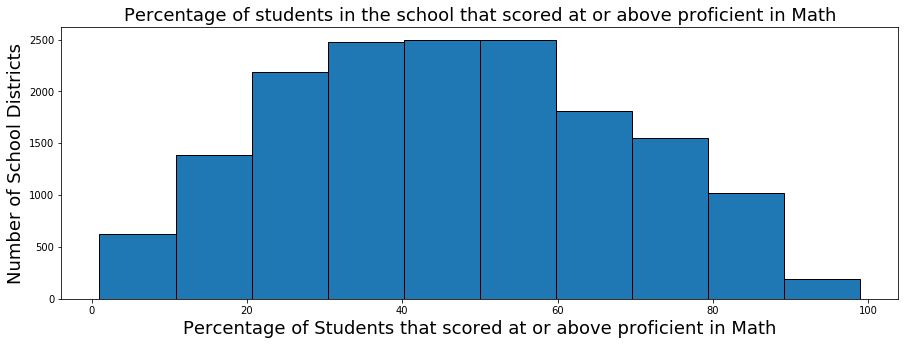

In [63]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize = (15,5))
ax.hist(math_achievement_data['ALL_MTH00PCTPROF_1516'], bins = 10, edgecolor='black')
ax.set_title("Percentage of students in the school that scored at or above proficient in Math", size=18)
ax.set_xlabel("Percentage of Students that scored at or above proficient in Math", size=18)
ax.set_ylabel("Number of School Districts", size=18)
plt.savefig("q3.png")
plt.show()

In [37]:
math_achievement_data.shape

(16237, 229)

## Solution 4

In [85]:
funding_cut = 0.15 * fiscal_data['TFEDREV'].sum()
print(funding_cut)

8340410870.7


In [133]:
fiscal_data_5 = fiscal_data[['LEAID', 'TOTALREV', 'TOTALEXP', '_66V', 'TFEDREV']]

In [134]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5.TOTALREV <= 0].index)

In [135]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5.TOTALEXP <= 0].index)

In [136]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5.TFEDREV <= 0].index)

In [137]:
fiscal_data_5['amount left'] = (fiscal_data_5['TOTALREV'] - fiscal_data_5['TOTALEXP'] - fiscal_data_5['_66V'])

In [138]:
fiscal_data_5 = fiscal_data_5.sort_values('amount left', ascending = False).drop(['TOTALREV', 'TOTALEXP', '_66V'], axis= 1)

In [139]:
fiscal_data_5['Rank'] = fiscal_data_5['amount left'].rank(ascending = 0)

In [140]:
fiscal_data_5 = fiscal_data_5.drop(fiscal_data_5[fiscal_data_5['amount left'] <= 0].index)

In [141]:
fiscal_data_5

,LEAID,TFEDREV,amount left,Rank
1904,0622710,1091400000,643215000,1.0
7676,2680995,73019000,310557000,2.0
3306,1500030,261131000,297425000,3.0
15038,4218990,271369000,206653000,4.0
6328,2400480,112717000,199357000,5.0
...,...,...,...,...
5833,2200047,406000,1000,10777.0
18127,5400511,1668000,1000,10777.0
3609,1700246,33000,1000,10777.0
6231,2313710,10000,1000,10777.0


In [143]:
fiscal_data_5['federal funding cut'] = [None] * fiscal_data_5['TFEDREV'].shape[0]
funding_to_be_cut = funding_cut
for idx in list(fiscal_data_5.index):
    federal_funding_cut = fiscal_data_5['amount left'][idx] * 0.4
    if fiscal_data_5['TFEDREV'][idx] < federal_funding_cut:
        federal_funding_cut = fiscal_data_5['amount left'][idx] * 0.2
    if fiscal_data_5['TFEDREV'][idx] < federal_funding_cut:
        continue
    if funding_to_be_cut < federal_funding_cut:
        fiscal_data_5['federal funding cut'][idx] = funding_to_be_cut
        print(fiscal_data_5['LEAID'][idx])
        print(fiscal_data_5['Rank'][idx])
        break
        
    fiscal_data_5['federal funding cut'][idx] = federal_funding_cut
    funding_to_be_cut -= federal_funding_cut

/opt/anaconda3/envs/ds5500/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


4215480
7298.5


/opt/anaconda3/envs/ds5500/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [146]:
fiscal_data_5 = fiscal_data_5[fiscal_data_5['federal funding cut'].notnull()]

In [149]:
fiscal_data_5 = fiscal_data_5.sort_values('federal funding cut', ascending = False).drop(['TFEDREV', 'amount left', 'Rank'], axis= 1)

In [152]:
fiscal_data_5[:20]

,LEAID,federal funding cut
1904,0622710,2.57286e+08
3306,1500030,1.1897e+08
15038,4218990,8.26612e+07
6328,2400480,7.97428e+07
7676,2680995,6.21114e+07
9784,3200060,5.58004e+07
3057,1201440,5.17112e+07
6006,2201170,4.26816e+07
7665,2680880,3.75602e+07
2240,0638010,3.03728e+07
